## Fourieranalyse von Daten

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


plt.rcParams.update({'font.size': 10,
                     'lines.linewidth': 1,
                     'lines.markersize': 5,
                     'axes.labelsize': 10,
                     'xtick.labelsize' : 9,
                     'ytick.labelsize' : 9,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',})

%config InlineBackend.figure_format = 'retina'

Das ist die bereinigte Version einer Fourier Analyse eines Signals, das künstlich berechnet ist. Den Code dazu haben wir grob in der Übung am 15. Dezember geschrieben. Weiter unten befindet sich eine bereinigte und verbesserte Variante die die Koeffizienten der Fourier Reihe

\begin{equation}
f(t)=\frac{A_{0}}{2}+\sum_{k=1}^{\infty}\left ( A_{k}\cos\left (\omega_k t\right) + B_{k}\sin\left (\omega_k t\right)\right )
\end{equation}

mit den Frequenzen  $\omega_k=\frac{2\pi k}{T}$ berechnet. Die Koeffizienten sind dabei durch die folgenden Integrale gegeben:

\begin{equation}
A_0= \frac{1}{T}\int\limits_{-\frac{T}{2}}^{+\frac{T}{2}} f(t) dt
\end{equation}


\begin{equation}
A_k=\frac{2}{T}\int\limits_{-\frac{T}{2}}^{+\frac{T}{2}} f(t)\cos(\omega_k t) dt  \text{ for } k \neq 0
\end{equation}

\begin{equation}
B_k=\frac{2}{T}\int\limits_{-\frac{T}{2}}^{+\frac{T}{2}} f(t) \sin(\omega_k t) dt,\,  \forall k
\end{equation}

die wir mit Hilfe eine Integration über die Trapezmethode realisiert haben.

## Integrationsmethode

Die folgende Funktion enthält die integration numerischer Daten mit Hilfe der Trapezmethode, wie wir sie in der Vorlesung behandelt haben.

In [4]:
def integrate_trapezoid(function_values, time_values):

    delta_t = time_values[1] - time_values[0]
    return np.sum((function_values[1:] + function_values[:-1]) * delta_t / 2)

## Berechnung der Fourierkoeffizienten

Dies Funktion berechnet die Koeffizienten $A_k$ und $B_k$ für die numerischen Daten in $f$ und die x-Achse $t$. Dabei werden die Koeffizienten mit dem Index $k$ berechnet und als Tupel zurückgegeben.

In [5]:
def calculate_coefficients(f, t, k):

    period = t[-1] - t[0]
    omega_k = 2 * np.pi * k / period
    A_temp = f * np.cos(omega_k * t)
    B_temp = f * np.sin(omega_k * t)
    A_k = 2 * integrate_trapezoid(A_temp, t) / period
    B_k = 2 * integrate_trapezoid(B_temp, t) / period

    if k == 0:
        A_k = integrate_trapezoid(f, t) / period

    return (A_k, B_k)

## Berechnung der Fourierreihe

Die unten stehende Funktion berechnet mit Hilfe der Koeffizienten und der x-Achse ($time$) die Fourierreihe.

In [6]:
def calculate_fourier_series(coefficients, time):
    
    period = time[-1] - time[0]
    fourier_series = np.zeros(len(time)) 

    for k, (A_k, B_k) in enumerate(coefficients):
        if k==0:
            fourier_series+= A_k / 2
        else:   
            omega_k = 2 * np.pi * k / period
            fourier_series += A_k * np.cos(omega_k * time) + B_k * np.sin(omega_k * time)

    return fourier_series

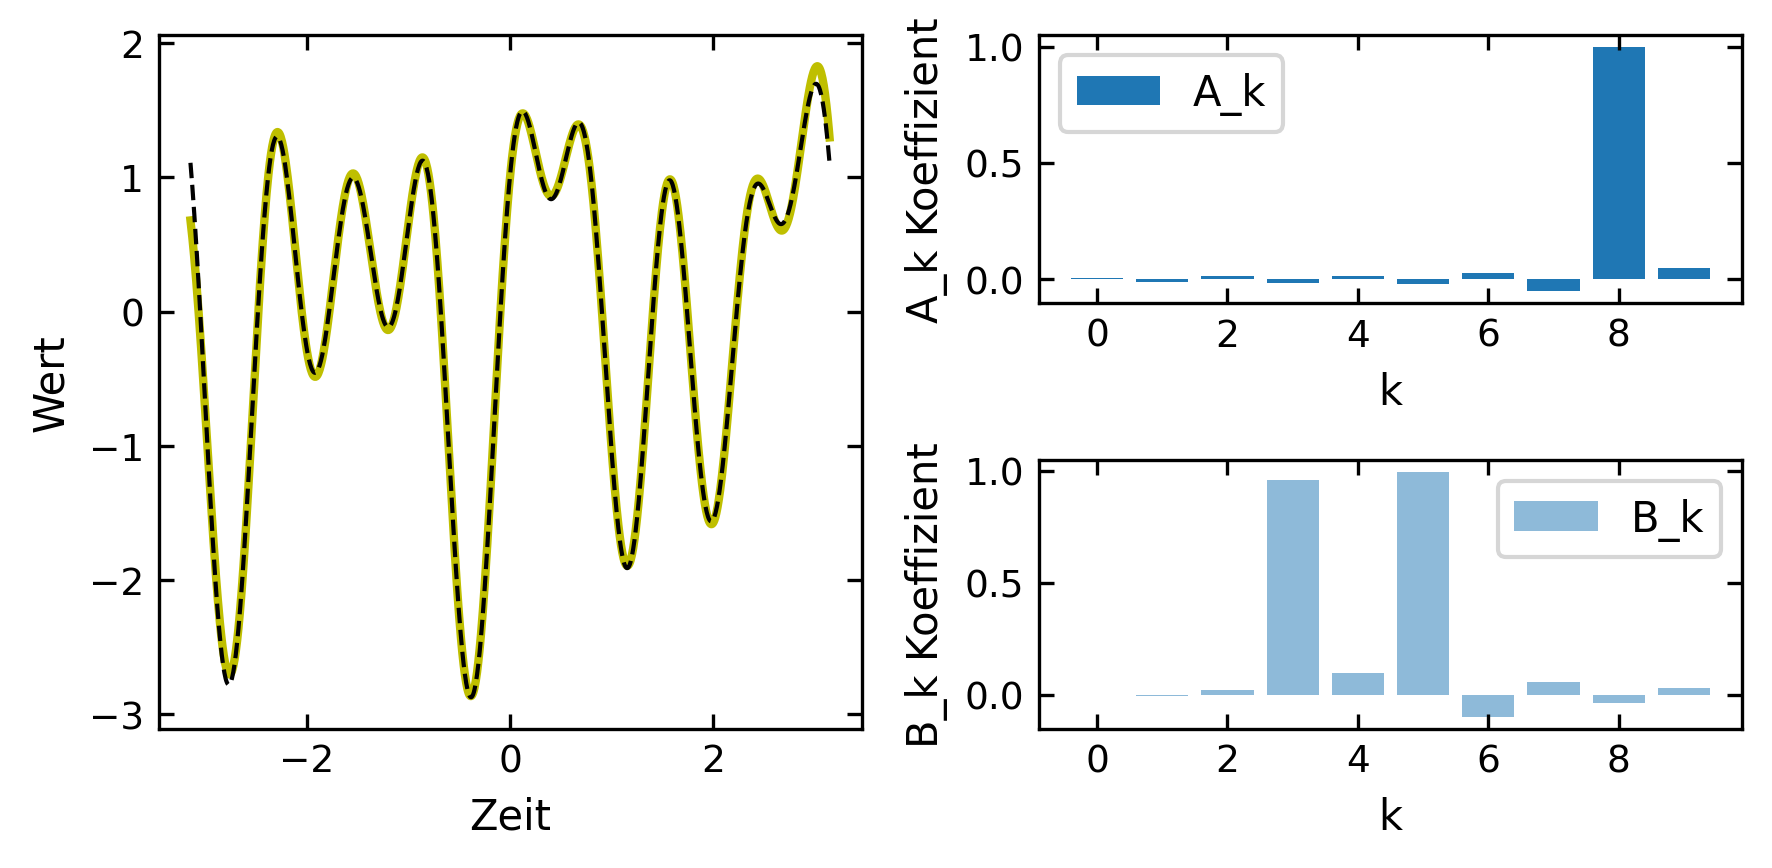

In [22]:
fig = plt.figure(figsize=(6, 3),dpi=150)
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

N=10 # Anzahl der Frequenzen omega_k
t=np.linspace(-np.pi,np.pi,1000) # x-Achse
func=np.sin(3*t)+np.sin(4.9*t)+np.cos(8.05*t) # Daten


c=[calculate_coefficients(func, t, k) for k in range(N)] # Koeffizienten berechnen
freihe=calculate_fourier_series(c,t) # Fourier Reihe berechnen
k_values = np.arange(len(c)) # Indizes
A_k, B_k = zip(*c) # Koeffizienten

ax0 = plt.subplot(gs[:, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, 1])

ax0.plot(t, func,"y-", lw=2,label='Funktion',zorder=-1)
ax0.plot(t, freihe,"k--", label='Fourierreihe',zorder=1)
ax0.set_xlabel('Zeit')
ax0.set_ylabel('Wert')

ax1.bar(k_values, A_k, label='A_k')
ax1.set_xlabel('k')
ax1.set_ylabel('A_k Koeffizient')
ax1.legend()

ax2.bar(k_values, B_k, label='B_k', alpha=0.5)
ax2.set_xlabel('k')
ax2.set_ylabel('B_k Koeffizient')
ax2.legend()

plt.tight_layout()
plt.show()